
# 1. Distributions Normales ou Gaussiennes



In [4]:
#import des bibliothèques python nécessaires :
import numpy as np

#plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Pour avoir un plot 3D interactif
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# Gaussienne et classifieur bayésien
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB

# pour manipuler les accès aux répertoires
import os

# Pour le traitement d'images et la vision par ordinateur
import cv2

On définit ci-dessous une fonction d'affichage d'une loi normale de 2 dimensions

In [2]:
# Affiche une loi Gaussienne à 2 dimensions. La fonction prend en paramètres la moyenne et la covariance, et les limites des axes
def plotGauss(mu,C, x_min=-2, x_max=2, y_min=-2, y_max=2, res = 300, title = 'Densité de probabilité Gaussienne'):
    #Create grid and multivariate normal
    x = np.linspace(x_min,x_max,res)
    y = np.linspace(y_min,y_max,res)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal(mu, C)   
    # Figure 3D
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(title)

cov matrix =  [[ 1.  -0.5]
 [-0.5  2. ]]


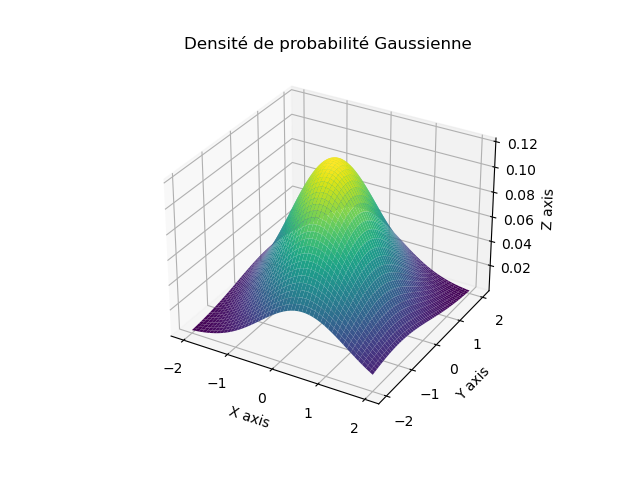

In [5]:
# Paramètres de la loi normale
# moyenne :
mu_x = 0
mu_y = 0
mu = np.array([mu_x, mu_y])
# Covariance :
C = np.array([[1, -0.5], \
                  [-0.5, 2]])

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)

## 1.a) Distribution normale de termes indépendants avec la même variance sur chaque composant
Il s'agit d'un cas particulier dans lequel chaque composant du vecteur est indépendant des autres et tous possèdent la même variance. Dans ce cas, la matrice de covariance s'écrit : 
$$
\Sigma=
\begin{pmatrix}
\sigma^2 & 0 & . & 0 \\
0 & \sigma^2 & . & 0 \\
. & . & . & 0\\
0 & . & 0 & \sigma^2\\
\end{pmatrix}
$$

#### Complétez le script ci-dessous pour visualiser l'allure de la distribution normale avec les paramètres suivants : 

+ ${\mu}=(0.5 , 0.5)^\top $ et $\sigma^2={0.2}$	
+ ${\mu}=(0 , 0)^\top$ et $\sigma^2={0.4}$	
+ ${\mu}=(-0.5 , 0.5)^\top$ et $\sigma^2={0.6}$

cov matrix =  [[0.2, 0], [0, 0.2]]


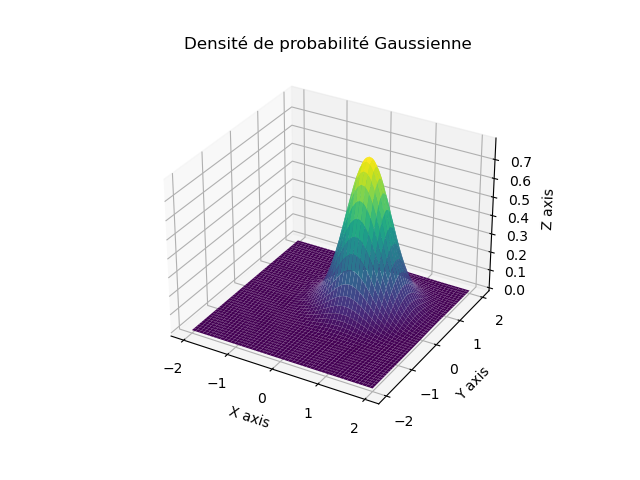

In [6]:
# COMPLETER

# Paramètres de la loi normale
# moyenne :
mu_x = 0.5
mu_y = 0.5
mu = np.array([mu_x, mu_y])
# Covariance :
C = [
    [0.2,0],
    [0,0.2]
]

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)

cov matrix =  [[0.4, 0], [0, 0.4]]


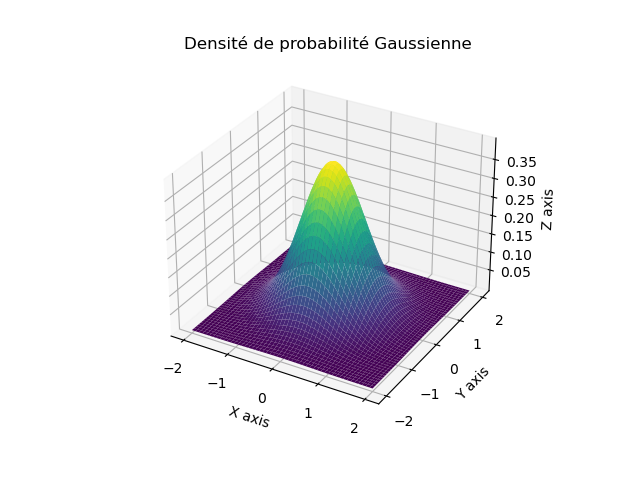

In [7]:
# COMPLETER

# Paramètres de la loi normale
# moyenne :
mu_x = 0
mu_y = 0
mu = np.array([mu_x, mu_y])
# Covariance :
C = [
    [0.4,0],
    [0,0.4]
]

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)

cov matrix =  [[0.6, 0], [0, 0.6]]


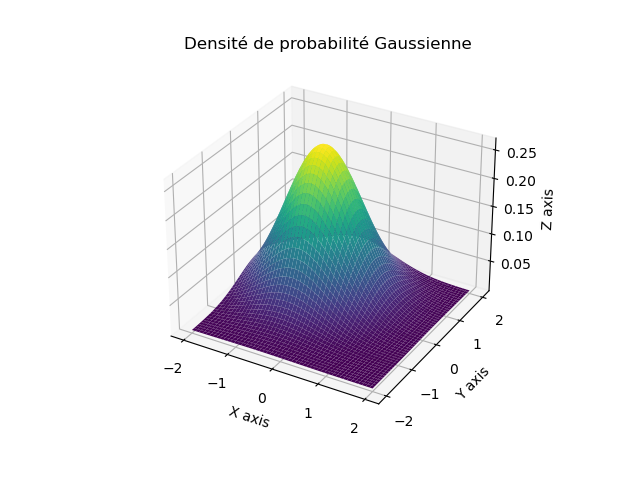

In [8]:
# COMPLETER

# Paramètres de la loi normale
# moyenne :
mu_x = -0.5
mu_y = 0.5
mu = np.array([mu_x, mu_y])
# Covariance :
C = [
    [0.6,0],
    [0,0.6]
]

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)

## 1.b) Distribution normale de termes indépendants avec des variances différentes sur chaque composant

Dans le cas d'une distribution normale avec des termes indépendants mais des variances différentes sur chaque composant, la forme générale de la matrice de covariance s'écrit :

$$
{\Sigma}=
\begin{pmatrix}
\sigma_1^2 & 0 & . & 0 \\
0 & \sigma_2^2 & . & 0 \\
. & . & . & 0\\
0 & . & 0 & \sigma_d^2\\
\end{pmatrix}
$$

#### Modifiez le code pour visualiser l'allure de la distribution normale avec les paramètres suivants : 

$${\Sigma}=
\begin{pmatrix}
0.3 & 0 \\
0 & 0.1 \\
\end{pmatrix}
$$

$${\Sigma}=
\begin{pmatrix}
0.1 & 0 \\
0 & 0.3 \\
\end{pmatrix}
$$


cov matrix =  [[0.3, 0], [0, 0.1]]


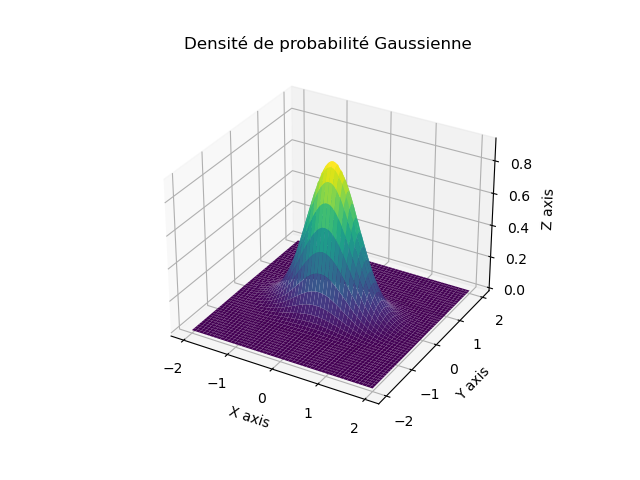

In [9]:
# COMPLETER
# Paramètres de la loi normale
# moyenne :
mu = np.array([0,0])
# Covariance :
C = [
    [0.3,0],
    [0,0.1]
]

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)

cov matrix =  [[0.1, 0], [0, 0.3]]


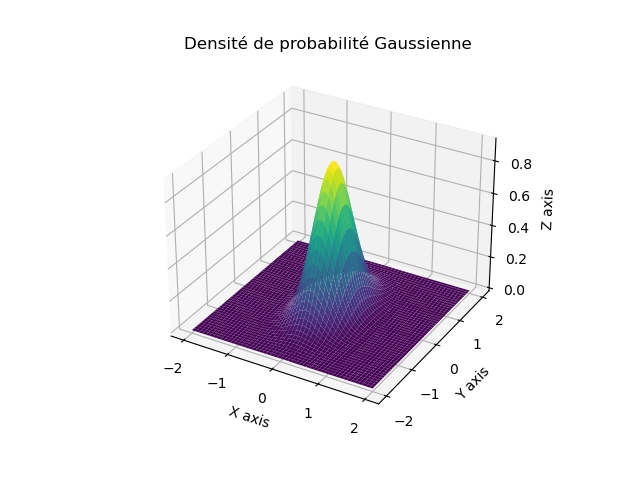

In [10]:
# COMPLETER
# Paramètres de la loi normale
# moyenne :
mu = np.array([0,0])
# Covariance :
C = [
    [0.1,0],
    [0,0.3]
]

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)

## 1.c) Cas général de la distribution normale

L'expression générale des paramètres associés à la distribution normale est :

$$
\vec{\mu} = \begin{pmatrix}
\mu_1  \\
. \\
\mu_d
\end{pmatrix}
$$

$$
{\Sigma}=
\begin{pmatrix}
\sigma_1^2 & \sigma_{12}^2 & . & \sigma_{1d}^2 \\
\sigma_{21}^2 & \sigma_2^2 & . & \sigma_{2d}^2 \\
. & . & . & \sigma_{(d-1)d}^2\\
\sigma_{d1}^2& . & \sigma_{d(d-1)}^2 & \sigma_d^2\\
\end{pmatrix}
$$

#### Modifiez le code pour visualiser l'allure de la distribution normale avec les paramètres suivants : 

 
$${\Sigma}=
\begin{pmatrix}
1 & 0.6 \\
0.6 & 0.7 \\
\end{pmatrix}
$$
 
$${\Sigma}=
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
\end{pmatrix}
$$

cov matrix =  [[1, 0.6], [0.6, 1]]


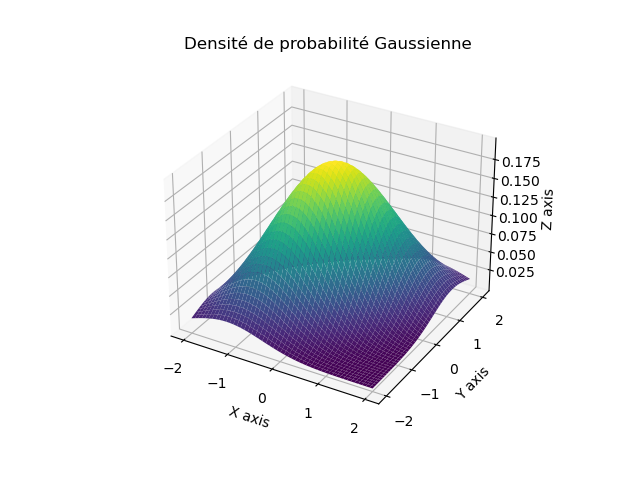

In [12]:
# Paramètres de la loi normale
# moyenne :
mu_x = 0
mu_y = 0
mu = np.array([mu_x, mu_y])
# Covariance :
# COMPLETER
C = [
    [1,0.6],
    [0.6,1]
]

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)

cov matrix =  [[1, 1], [1, 2]]


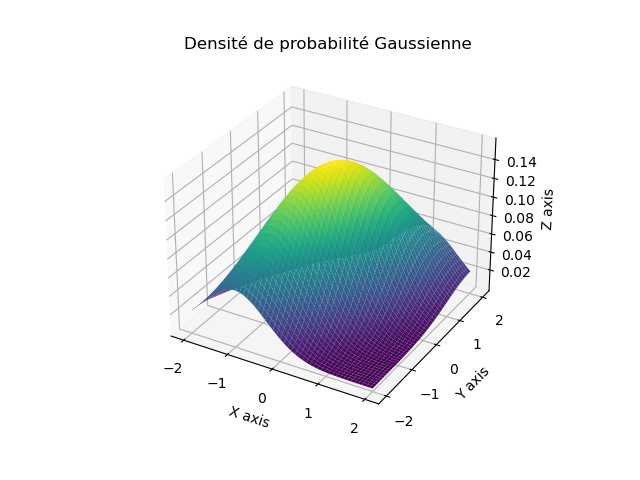

In [13]:
# Paramètres de la loi normale
# moyenne :
mu_x = 0
mu_y = 0
mu = np.array([mu_x, mu_y])
# Covariance :
# COMPLETER
C = [
    [1,1],
    [1,2]
]

print("cov matrix = ", C)

# affichage
plotGauss(mu,C)


# 2. Classification bayésienne avec hypothèse Gaussienne

Dans cette section, nous allons étudier un exemple de classification pour illustrer la manière dont on peut construire un classifieur bayésien Gaussien sur des données réelles.

La Figure ci-dessous illustre les 2 classes de fleurs.
Les données ont été séparées pour former un ensemble d'entrainement et un ensemble de test de 10 exemples chacun.

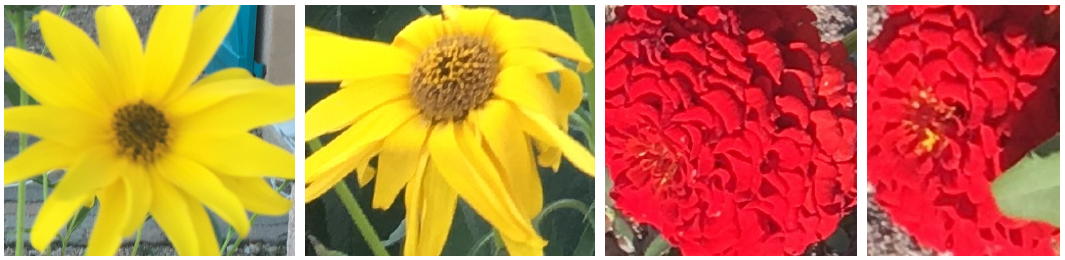

L'apprentissage se déroule en 2 étapes : 
+ Extraction de caractéristiques (feature extraction): un vecteur de caractéristique doit être créé pour chaque exemple. De telles caractéristiques peuvent être (i) déterminées a priori ou (ii) apprises. Nous verrons dans le cours de deep learning comment elles peuvent être apprises par un réseau de neurones. Ici nous allons les définir nous-même à priori. Dans cet exemple simple il semble que la couleur soit un critère adapté à la classification. Nous proposons donc dans un premier temps de construire des vecteurs de caractéristiques composés de la moyenne des composantes rouges et de la moyenne des composantes vertes de chaque image. Les valeurs des pixels seront normalisées pour que les valeurs soient comprises entre 0 et 1 au lieu de 0 et 255.
+ Estimations de la vraisemblance : estimation des paramètres (vecteur moyen et covariance) des distributions normales associées à chaque classe à partir des données d'apprentissage.


## 2.a) Chargement des données et extraction des caractéristiques

In [55]:
training_images_path ='images/dataset2/app/'
testing_images_path ='images/dataset2/test/'

# Fonction d'extraction de caractéristiques d'une image
def getfeature(filename):
    print(filename)
    im = cv2.imread(filename)
#    imrgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imrgb = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    R = imrgb[:,:,0]
    G = imrgb[:,:,1]
    B = imrgb[:,:,2]    
    In= R+G+B # Calcul de l'intensité des pixels
    mIn = np.max((In.flatten())) # Calcul de l'intensité maximale
    # normalisation
    Rn = R/mIn
    Gn = G/mIn
    Bn = B/mIn    
    # Calcul de la moyenne de chaque composante
    X = [np.mean(Rn.flatten()),np.mean(Gn.flatten()),np.mean(Bn.flatten())]    
    return X

# Fonction d'extraction de caractéristiques pour toutes les images d'un répertoire de la classe cl
def getfeatures (path, cl):
    X = []
    scl = 'c'+str(cl)
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and scl in i:
            print("processing file ",i)
            X.append(getfeature(path+i))
    return np.asarray(X)

In [56]:
im = cv2.imread('images/dataset1/app/c1_001.jpg')
im.shape


(630, 727, 3)

In [64]:
# Calcul des caractéristiques pour les images de la base d'entrainement :
X1 = getfeatures(training_images_path, 1) # pour la classe 1
X2 = getfeatures(training_images_path, 2) # pour la classe 2

# Calcul des caractéristiques pour les images de la base de test :
Xtest1 = getfeatures(testing_images_path, 1) # pour la classe 1
Xtest2 = getfeatures(testing_images_path, 2) # pour la classe 2

processing file  c1_006.jpg
images/dataset2/app/c1_006.jpg
processing file  c1_010.jpg
images/dataset2/app/c1_010.jpg
processing file  c1_003.jpg
images/dataset2/app/c1_003.jpg
processing file  c1_007.jpg
images/dataset2/app/c1_007.jpg
processing file  c1_001.jpg
images/dataset2/app/c1_001.jpg
processing file  c1_002.jpg
images/dataset2/app/c1_002.jpg
processing file  c1_004.jpg
images/dataset2/app/c1_004.jpg
processing file  c1_009.jpg
images/dataset2/app/c1_009.jpg
processing file  c1_005.jpg
images/dataset2/app/c1_005.jpg
processing file  c1_008.jpg
images/dataset2/app/c1_008.jpg
processing file  c2_010.jpg
images/dataset2/app/c2_010.jpg
processing file  c2_009.jpg
images/dataset2/app/c2_009.jpg
processing file  c2_004.jpg
images/dataset2/app/c2_004.jpg
processing file  c2_005.jpg
images/dataset2/app/c2_005.jpg
processing file  c2_006.jpg
images/dataset2/app/c2_006.jpg
processing file  c2_008.jpg
images/dataset2/app/c2_008.jpg
processing file  c2_007.jpg
images/dataset2/app/c2_007.j

In [58]:
X1

array([[0.07707372, 0.6406542 , 0.88332156],
       [0.1116717 , 0.52951031, 0.83174856],
       [0.09830552, 0.61569975, 0.87650401],
       [0.13289333, 0.52762443, 0.92592896],
       [0.09661133, 0.69293286, 0.66057138],
       [0.13802117, 0.69031144, 0.60995547],
       [0.11592456, 0.57610895, 0.85560001],
       [0.07898994, 0.57472606, 0.89889964],
       [0.11763579, 0.66184051, 0.65329051],
       [0.10886809, 0.54523186, 0.85770945]])

In [59]:
X2

array([[0.07859762, 0.55806331, 0.82715991],
       [0.13479728, 0.40987082, 0.91267847],
       [0.14913808, 0.4210632 , 0.83092758],
       [0.12128064, 0.55975656, 0.8631194 ],
       [0.14844631, 0.40143581, 0.85645157],
       [0.13808322, 0.49181888, 0.78989608],
       [0.08610616, 0.70367664, 0.8336263 ],
       [0.11915673, 0.56312266, 0.86886328],
       [0.09573515, 0.56271814, 0.88403259],
       [0.11004292, 0.70402663, 0.37363971]])

### A Faire :

Récupérer uniquement les moyennes des rouges et des verts comme caractéristiques. Les tableaux $X1$ et $X2$ résultants ne doivent plus avoir que 2 colonnes (idem pour $Xtest1$ et $Xtest2$)

dim X1:  (10, 2)


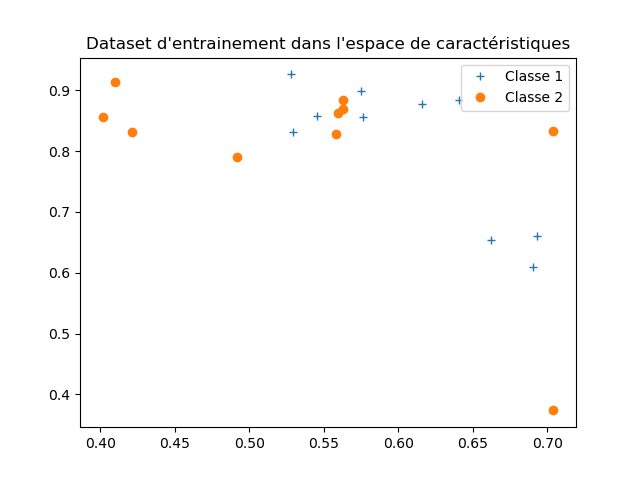

In [65]:
# A COMPLETER 
X1 = X1[:,1:]
X2 = X2[:,1:]
Xtest1 = Xtest1[:,1:]
Xtest2 = Xtest2[:,1:]
print('dim X1: ', X1.shape)

# Affichage
plt.figure()
plt.plot(X1[:,0],X1[:,1],'+',label='Classe 1')
plt.plot(X2[:,0],X2[:,1],'o',label = 'Classe 2')
plt.legend()
plt.title('Dataset d\'entrainement dans l\'espace de caractéristiques')
plt.show()

## 2.b) Estimation paramétrique des vraisemblances Gaussiennes

### A Faire :

En supposant que la vraisemblance pour chaque classe est une loi Gaussienne, estimez les paramètres de ces 2 Gaussiennes à partir de $X1$ et $X2$. Vous pourrez utiliser les fonction numpy ```np.cov``` et ```np.mean``` (voir la documentation numpy de ces fonctions ainsi que les dimensions des tableaux pour les utiliser correctement)

In [49]:
# Calcul des matrices de covariance
# A COMPLETER 
# X1 et X2 sont les caractéristiques (features)
# C1 et C2 sont les matrices de covariance 
# mu1 et mu2 sont les vecteurs moyens 

C1 = np.cov(X1.T)
C2 = np.cov(X2.T)
print("cov matrix 1 = ", C1)
print("cov matrix 2 = ", C2)
# Calcul des vecteurs moyens
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)
print("mu1 = ", mu1)
print("mu2 = ", mu2)

cov matrix 1 =  [[0.01354959 0.01312962]
 [0.01312962 0.0141937 ]]
cov matrix 2 =  [[0.02371557 0.02466097]
 [0.02466097 0.03083848]]
mu1 =  [0.8006545  0.55192014]
mu2 =  [0.79935456 0.61760444]


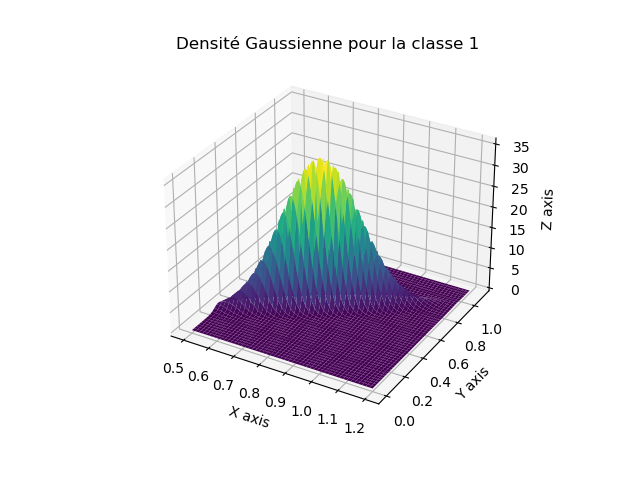

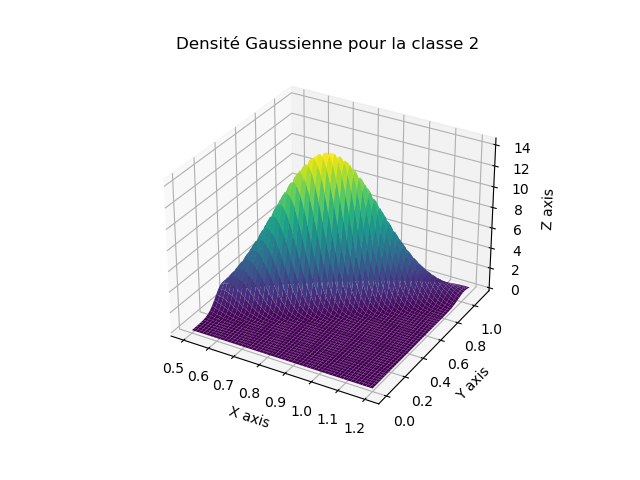

In [50]:
# Affichage
plotGauss(mu1,C1, x_min=0.5, x_max = 1.2, y_min=0, y_max = 1.1, title='Densité Gaussienne pour la classe 1')
plt.show()
plotGauss(mu2,C2, x_min=0.5, x_max = 1.2, y_min=0, y_max = 1.1, title='Densité Gaussienne pour la classe 2')
plt.show()

## 2.c) Classification des exemples de test à partir d'un classifieur Bayésien

La classification bayésienne consiste à formaliser le problème sous la forme de lois de probabilités. Connaissant une observation, on cherche à déterminer la classe associée en fonction des probabilités à priori et d'une fonction de vraisemblance (likelihood).
+ Soit $\{c_1,c_2, ...c_c\}$ un ensemble de $c$ classes et
	$\bf{x}$ un vecteur de caractéristiques.
+ Pour chaque classe $c_i$ on suppose connaître :	
    - $P(c_i)$ : la probabilité a priori de cette classe,
    - $p(\bf{x}|c_i)$ : la densité de probabilité de $\bf{x}$ conditionnée par cette classe


La règle de Bayes permet de calculer la probabilité d'une classe a posteriori, c'est-à-dire conditionnée par l'observation de $\vec{x}$, soit
$$
p(c_i|\bf{x})=\cfrac{p(\bf{x}|c_i)p(c_i)}{p(\bf{x})}
$$
avec :
$$ p(\bf{x})=\sum_i (p(\bf{x}|c_i).P(c_i))$$

La classification Bayésienne qui minimise l'erreur de classification consiste alors simplement à attribuer à chaque exemple la classe qui maximise la distribution a postériori.

**Dans une approche dite naïve (Naive Bayes), on suppose de plus l'indépendance des caractéristiques**. Autrement dit, la matrice de covariance est supposée diagonale et les vraisemblances sont estimées indépendamment pour chaque composant des vecteurs de caractéristiques.

Dans la bibliothèque `sklearn`, les classifieurs bayésiens naïfs gaussiens sont implémentés dans la fonction `GaussianNB`.

### A Faire :

Créer un classifieur Bayésien naif (`GaussianNB`) en supposant que les probabilités a priori sont identiques pour les 2 classes.
Ajustez-le aux données d'entrainement. Vous pouvez vous aider de la documentation

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [51]:
#COMPLETER
# Classifieur:
clf = GaussianNB(priors=[0.5,0.5])

Xtrain = np.concatenate([X1,X2])
Ytrain = np.ones(20)
Ytrain[10:] = 2

# Fit :
clf.fit(Xtrain, Ytrain)

GaussianNB(priors=[0.5, 0.5])

In [52]:
# COMPLETER
#Evaluation
Xtest = np.concatenate([Xtest1,Xtest2])
Ytest = np.ones(20)
Ytest[10:] = 2

score_test = clf.score(Xtest, Ytest)
score_train = clf.score(Xtrain, Ytrain)
print("prediction test1", clf.predict(Xtest1))
print("prediction test2", clf.predict(Xtest2))

prediction test1 [1. 1. 2. 1. 2. 1. 1. 2. 1. 1.]
prediction test2 [1. 2. 1. 2. 2. 1. 2. 2. 2. 2.]


In [53]:
# Préparation affichage
h = .005  # step size in the mesh
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
x_min, x_max = Xtrain[:, 0].min() - .5, Xtrain[:, 0].max() + .5
y_min, y_max = Xtrain[:, 1].min() - .5, Xtrain[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # predictions
Z = Z.reshape(xx.shape)

/tmp/ipykernel_54029/3325737837.py:8: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(Xtest[:, 0], Xtest[:, 1], c=Ytest, marker = '+',cmap=cm_bright, edgecolors='k', alpha=0.6, label='train' )


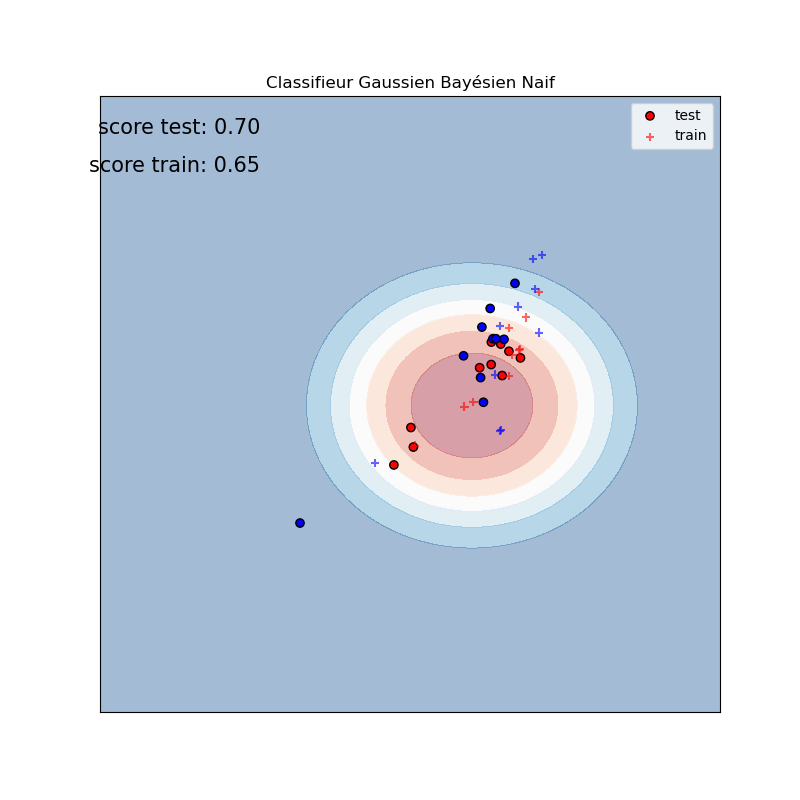

In [54]:
# Affichage données train et test, et frontière
fig, ax1 = plt.subplots(figsize=(8,8))
# contour
ax1.contourf(xx, yy, Z, cmap=cm, alpha=.4)
# Points train
ax1.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, cmap=cm_bright, edgecolors='k',label='test')
# Points test
ax1.scatter(Xtest[:, 0], Xtest[:, 1], c=Ytest, marker = '+',cmap=cm_bright, edgecolors='k', alpha=0.6, label='train' )
# mise en forme du plot
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title("Classifieur Gaussien Bayésien Naif")
ax1.text(xx.min() + .4, yy.max() - .1, ('score test: %.2f' % score_test).lstrip('0'),
        size=15, horizontalalignment='right')
ax1.text(xx.min() + .4, yy.max() - .2, ('score train: %.2f' % score_train).lstrip('0'),
        size=15, horizontalalignment='right')
plt.legend()


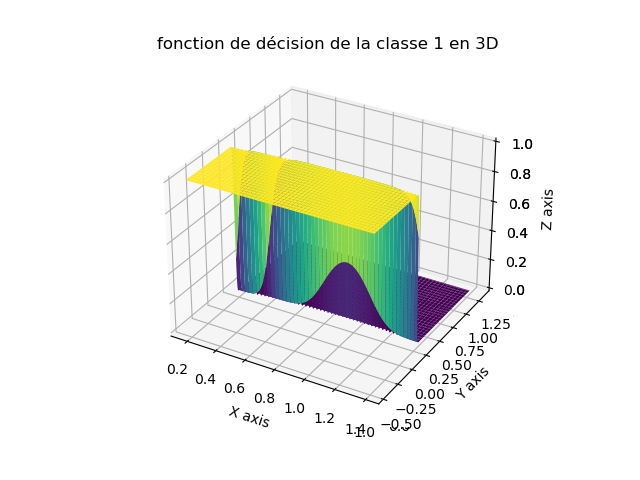

In [42]:
#Make a 3D plot
fig, ax2 = plt.subplots(subplot_kw={"projection": "3d"}) 
ax2 = fig.add_subplot(projection='3d')  
ax2.plot_surface(xx,yy, Z,cmap='viridis',linewidth=0)
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('fonction de décision de la classe 1 en 3D')
plt.show()

### A Faire :

Reprendre l'exercice avec le dataset2.

+ Travaillez sur le deuxième dataset (changez `training_images_path` et `testing_images_path`) pour `dataset2`. Exécutez le script et concluez sur la performance du classifieur sur cette nouvelle base. Quel est le problème ?
+ Pour améliorer le classifieur, essayez de modifier le choix des features : par exemple convertir les couleurs des l'espace RGB vers HSV (teinte saturation, valeur) et conserver uniquement la moyenne de la teinte et de la saturation $(H,S)$ comme vecteur de caractéristiques. (La manière la plus simple consiste à changer le flag `cv2.COLOR_BGR2RGB` dans la commande `imrgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)` par `cv2.COLOR_BGR2HSV`. Exécutez le script et comparez les performances des nouvelles caractéristiques par rapport aux premières.
+ Essayez d'obtenir les meilleurs résultats possibles sur le dataset2
    